In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

plt.style.use('dark_background')

## 1. Look at the data given below. Plot the data, find the outliers and find out  μ,σ,σ^2

In [2]:
x = np.array([['Allied Signal' ,'Bankers Trust','General Mills','ITT Industries','J.P.Morgan & Co.',
'Lehman Brothers','Marriott','MCI','Merrill Lynch','Microsoft','Morgan Stanley','Sun Microsystems','Travelers','US Airways','Warner-Lambert'
],[24.23,25.53,25.41,24.14,29.62,28.25,25.81,24.39,40.26,32.95,91.36,25.99,39.42,26.71,35.00]])

In [3]:
print(x.shape)

a =np.vstack(x[0])
b = np.vstack(x[1])

print(a.shape)
print(b.shape)


x = np.hstack((a,b))
print(x.shape)



(2, 15)
(15, 1)
(15, 1)
(15, 2)


In [4]:
df = pd.DataFrame(x)
df.head()

,0,1
0,Allied Signal,24.23
1,Bankers Trust,25.53
2,General Mills,25.41
3,ITT Industries,24.14
4,J.P.Morgan & Co.,29.62


In [5]:
df.rename({0:'company_name',1:'measure'},axis=1,inplace= True)

In [6]:
df.head()

,company_name,measure
0,Allied Signal,24.23
1,Bankers Trust,25.53
2,General Mills,25.41
3,ITT Industries,24.14
4,J.P.Morgan & Co.,29.62


In [7]:
df = df.astype(dtype={'measure':float})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  15 non-null     object 
 1   measure       15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 368.0+ bytes


In [9]:
df.describe()

,measure
count,15.000000
mean,33.271333
std,16.945401
min,24.140000
25%,25.470000
50%,26.710000
75%,33.975000
max,91.360000


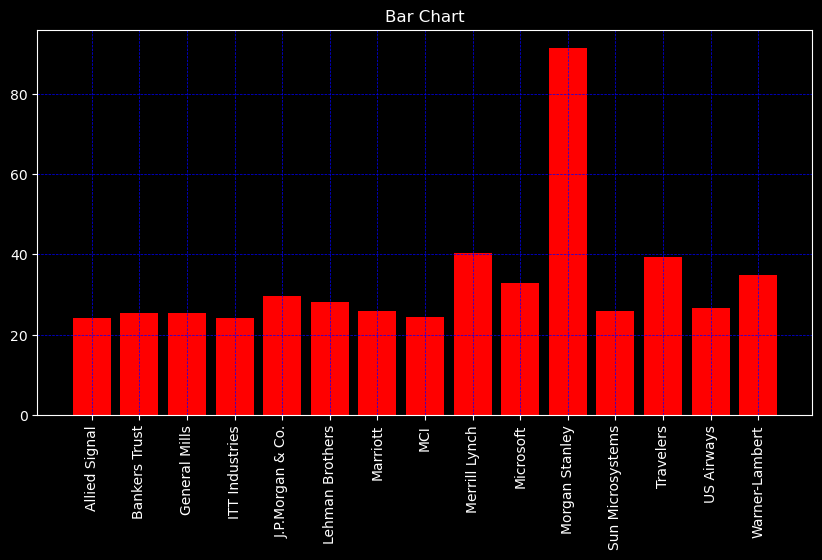

In [10]:
plt.figure(figsize=(10,5))

plt.bar(df['company_name'],df['measure'],color = 'red')

plt.title('Bar Chart')
plt.xticks(rotation = 'vertical')
plt.grid(color='blue', linestyle='--', linewidth=.5,fillstyle='full')
plt.show()

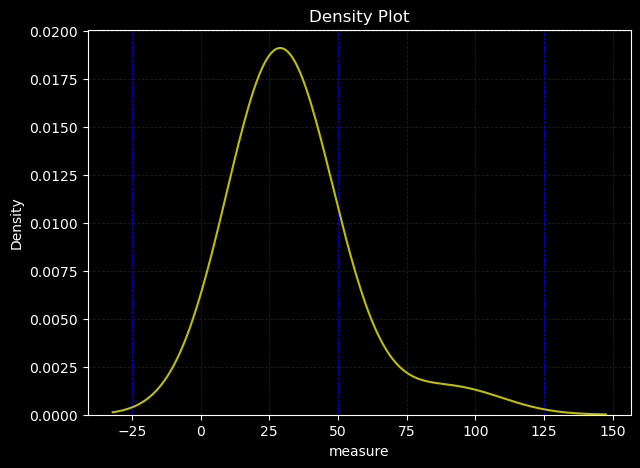

In [11]:
plt.figure(figsize=(7,5))

sns.kdeplot(df['measure'],color='y',bw_adjust=1.9)

plt.title('Density Plot')
plt.grid(color='blue', linestyle='--', linewidth=.6,fillstyle='full')
plt.show()

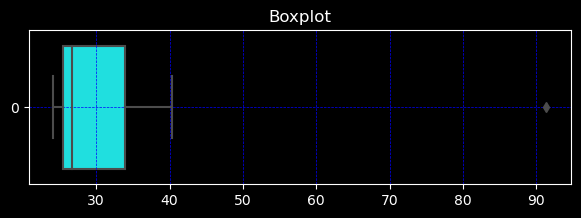

In [12]:
plt.figure(figsize=(7,2))

sns.boxplot(df['measure'],orient='h',color='cyan')
plt.title('Boxplot')
plt.grid(color='blue', linestyle='--', linewidth=.5,fillstyle='full')
plt.show()

In [13]:
print('mean:',np.round(df['measure'].mean(),2))
print('std dev:',np.round(df['measure'].std(),2))
print('var:',np.round(df['measure'].var(),2))
print('skew:',np.round(df['measure'].skew(),2)) # highly right skewed
print('kurtosis:',np.round(st.kurtosis(df['measure']),2)) # leptokurtic 

mean: 33.27
std dev: 16.95
var: 287.15
skew: 3.26
kurtosis: 7.6


In [14]:
# for outlier detection
q1 = df['measure'].quantile(.25)
q3 = df['measure'].quantile(.75)
iqr = q3 - q1

min_val = q1 - (1.5 * iqr)
max_val = q3 + (1.5 * iqr)

df[(df['measure'] < min_val) | (df['measure'] > max_val)]

,company_name,measure
10,Morgan Stanley,91.36
